In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Data Preparation

In [2]:
covid_hospitalization_data = pd.read_csv("/Users/alex/Documents/Covid_Data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv")
covid_hospitalization_data["date"] = pd.to_datetime(covid_hospitalization_data["date"])
covid_hospitalization_data.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,Demo | State Geographic Boundaries
0,OR,2021-02-26,1,56,7,2,55,7,9.0,62,...,0,NaN,0,NaN,0,45.0,48,102.0,48,NaN
1,KS,2021-02-24,14,133,3,17,130,3,3.0,147,...,0,NaN,0,NaN,0,47.0,147,219.0,147,NaN
2,NH,2021-02-17,5,24,1,6,23,1,2.0,30,...,0,NaN,0,NaN,0,27.0,16,39.0,16,NaN
3,MA,2021-01-30,10,90,1,11,89,1,83.0,100,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,ND,2021-01-30,16,33,2,16,33,2,30.0,50,...,0,NaN,0,NaN,0,33.0,6,65.0,6,NaN


In [3]:
MA_data = covid_hospitalization_data[covid_hospitalization_data['state']=='MA'].sort_values('date')
MA_data.shape

(1164, 136)

In [4]:
MA_data.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,Demo | State Geographic Boundaries
15475,MA,2020-03-27,0,0,1,0,0,1,0.0,1,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
17144,MA,2020-03-28,0,0,1,0,0,1,0.0,1,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
15869,MA,2020-03-29,0,0,2,0,0,2,0.0,2,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
20763,MA,2020-03-30,0,0,6,0,0,6,0.0,5,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
16094,MA,2020-03-31,0,0,11,0,0,11,0.0,9,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


### Vector Auto Regression (VAR)

In [5]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [6]:
index = ['date']

target_feature = ['total_adult_patients_hospitalized_confirmed_covid']

selected_features = ['inpatient_beds_used',
                     'inpatient_beds_used_covid',
                     'previous_day_admission_adult_covid_confirmed',
                     'previous_day_admission_pediatric_covid_confirmed',
                     'previous_day_admission_adult_covid_suspected',
                     'previous_day_admission_pediatric_covid_suspected',
                     'percent_of_inpatients_with_covid']

In [7]:
filtered_data = MA_data[index + target_feature + selected_features]
filtered_data.set_index(index,inplace=True)
filtered_data

,total_adult_patients_hospitalized_confirmed_covid,inpatient_beds_used,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_adult_covid_suspected,previous_day_admission_pediatric_covid_suspected,percent_of_inpatients_with_covid
date,,,,,,,,
2020-03-27,NaN,136.0,63.0,NaN,NaN,NaN,NaN,0.463235
2020-03-28,NaN,141.0,68.0,NaN,NaN,NaN,NaN,0.482270
2020-03-29,NaN,136.0,97.0,NaN,NaN,NaN,NaN,0.529412
2020-03-30,NaN,668.0,153.0,NaN,NaN,NaN,NaN,0.409375
2020-03-31,NaN,976.0,235.0,NaN,NaN,NaN,NaN,0.332803
...,...,...,...,...,...,...,...,...
2023-05-30,149.0,13102.0,180.0,28.0,0.0,41.0,2.0,0.013738
2023-05-31,146.0,13513.0,173.0,32.0,1.0,54.0,0.0,0.012802
2023-06-01,149.0,13564.0,178.0,27.0,2.0,43.0,0.0,0.013123


In [8]:
filtered_data = filtered_data.dropna()
filtered_data

,total_adult_patients_hospitalized_confirmed_covid,inpatient_beds_used,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_adult_covid_suspected,previous_day_admission_pediatric_covid_suspected,percent_of_inpatients_with_covid
date,,,,,,,,
2020-07-02,0.0,11901.0,910.0,0.0,0.0,0.0,0.0,0.074279
2020-07-15,175.0,13080.0,580.0,20.0,0.0,254.0,0.0,0.043272
2020-07-16,176.0,13014.0,564.0,33.0,0.0,248.0,0.0,0.042339
2020-07-17,164.0,12614.0,553.0,26.0,0.0,247.0,0.0,0.042889
2020-07-18,173.0,11503.0,523.0,21.0,0.0,201.0,0.0,0.044510
...,...,...,...,...,...,...,...,...
2023-05-30,149.0,13102.0,180.0,28.0,0.0,41.0,2.0,0.013738
2023-05-31,146.0,13513.0,173.0,32.0,1.0,54.0,0.0,0.012802
2023-06-01,149.0,13564.0,178.0,27.0,2.0,43.0,0.0,0.013123


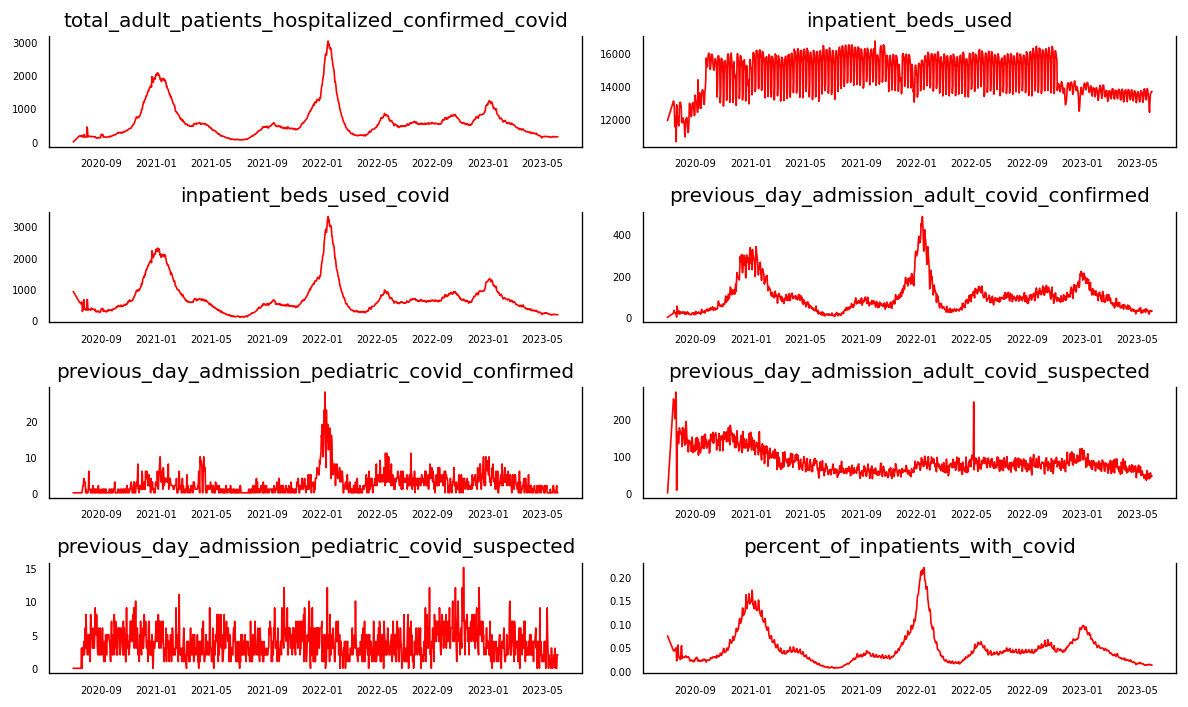

In [9]:
fig, axes = plt.subplots(nrows=int(len(selected_features + target_feature)/2), ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i < len(filtered_data.columns):
        data = filtered_data[filtered_data.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(filtered_data.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)

plt.tight_layout();

In [10]:
len(filtered_data.columns)

8

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(filtered_data, variables = filtered_data.columns)        

/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since funct

/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alex/opt/anaconda3/envs

,total_adult_patients_hospitalized_confirmed_covid_x,inpatient_beds_used_x,inpatient_beds_used_covid_x,previous_day_admission_adult_covid_confirmed_x,previous_day_admission_pediatric_covid_confirmed_x,previous_day_admission_adult_covid_suspected_x,previous_day_admission_pediatric_covid_suspected_x,percent_of_inpatients_with_covid_x
total_adult_patients_hospitalized_confirmed_covid_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1632,0.0000
inpatient_beds_used_y,0.0000,1.0000,0.0023,0.0000,0.0633,0.0000,0.0000,0.0146
inpatient_beds_used_covid_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0596,0.0000
previous_day_admission_adult_covid_confirmed_y,0.0000,0.0000,0.0000,0.7088,0.0002,0.0000,0.0068,0.0000
previous_day_admission_pediatric_covid_confirmed_y,0.0000,0.0341,0.0000,0.0000,1.0000,0.0204,0.0003,0.0000
previous_day_admission_adult_covid_suspected_y,0.0479,0.0000,0.0001,0.0000,0.3588,1.0000,0.0086,0.0000
previous_day_admission_pediatric_covid_suspected_y,0.0710,0.0000,0.0922,0.0884,0.4297,0.0091,1.0000,0.0003
percent_of_inpatients_with_covid_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [12]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(filtered_data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
total_adult_patients_hospitalized_confirmed_covid ::  413.55    > 143.6691  =>   True
inpatient_beds_used ::  289.97    > 111.7797  =>   True
inpatient_beds_used_covid ::  182.95    > 83.9383   =>   True
previous_day_admission_adult_covid_confirmed ::  111.3     > 60.0627   =>   True
previous_day_admission_pediatric_covid_confirmed ::  71.82     > 40.1749   =>   True
previous_day_admission_adult_covid_suspected ::  35.99     > 24.2761   =>   True
previous_day_admission_pediatric_covid_suspected ::  13.33     > 12.3212   =>   True
percent_of_inpatients_with_covid ::  0.03      > 4.1296    =>   False


In [13]:
test_size = 20
df_train, df_test = filtered_data[0:-test_size], filtered_data[-test_size:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(1035, 8)
(20, 8)


In [14]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [15]:
for name, column in df_train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "total_adult_patients_hospitalized_confirmed_covid" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7942
 No. Lags Chosen       = 14
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "inpatient_beds_used" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9676
 No. Lags Chosen       = 21
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.038. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "inpatient_beds_used_covid" 
    ---------------------------------------------

In [16]:
model = VAR(df_train)
model.select_order(maxlags=8).summary()

/Users/alex/opt/anaconda3/envs/seir/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,36.96,37.00,1.125e+16,36.97
1,27.74,28.09,1.119e+12,27.87
2,26.97,27.62,5.167e+11,27.22
3,26.63,27.59,3.687e+11,27.00
4,26.36,27.63,2.799e+11,26.84
5,26.13,27.70,2.219e+11,26.72
6,25.02,26.90,7.320e+10,25.73
7,23.77,25.96,2.105e+10,24.60
8,22.38*,24.88*,5.245e+09*,23.33*


In [17]:
model_fitted = model.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Jun, 2023
Time:                     19:27:04
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    24.8775
Nobs:                     1027.00    HQIC:                   23.3275
Log likelihood:          -22629.7    FPE:                5.24456e+09
AIC:                      22.3791    Det(Omega_mle):     3.20990e+09
--------------------------------------------------------------------
Results for equation total_adult_patients_hospitalized_confirmed_covid
                                                          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------
const                                                      -75.986024        35.884282           -2.

In [18]:
def adjust(val, length= 6): return str(val).ljust(length)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(filtered_data.columns, out):
    print(adjust(col), ':', round(val, 2))
    
## No significant serial correlation

total_adult_patients_hospitalized_confirmed_covid : 2.02
inpatient_beds_used : 2.02
inpatient_beds_used_covid : 2.08
previous_day_admission_adult_covid_confirmed : 1.98
previous_day_admission_pediatric_covid_confirmed : 2.0
previous_day_admission_adult_covid_suspected : 1.97
previous_day_admission_pediatric_covid_suspected : 1.99
percent_of_inpatients_with_covid : 2.1


In [19]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 8

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

8


array([[1.64000000e+02, 1.30300000e+04, 2.34000000e+02, 4.00000000e+01,
        2.00000000e+00, 5.70000000e+01, 4.00000000e+00, 1.81016477e-02],
       [1.58000000e+02, 1.31070000e+04, 2.25000000e+02, 3.20000000e+01,
        1.00000000e+00, 5.70000000e+01, 0.00000000e+00, 1.72957183e-02],
       [1.60000000e+02, 1.35860000e+04, 2.37000000e+02, 4.70000000e+01,
        1.00000000e+00, 7.10000000e+01, 2.00000000e+00, 1.75802982e-02],
       [1.59000000e+02, 1.37180000e+04, 2.18000000e+02, 2.70000000e+01,
        2.00000000e+00, 4.70000000e+01, 5.00000000e+00, 1.60235208e-02],
       [1.59000000e+02, 1.36920000e+04, 2.17000000e+02, 2.00000000e+01,
        0.00000000e+00, 5.50000000e+01, 9.00000000e+00, 1.59793814e-02],
       [1.56000000e+02, 1.36220000e+04, 2.07000000e+02, 3.30000000e+01,
        0.00000000e+00, 6.00000000e+01, 5.00000000e+00, 1.53151820e-02],
       [1.51000000e+02, 1.33670000e+04, 2.06000000e+02, 2.70000000e+01,
        0.00000000e+00, 5.20000000e+01, 2.00000000e+00, 1.

In [20]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=test_size)
df_forecast = pd.DataFrame(fc, index=filtered_data.index[-test_size:], columns=filtered_data.columns)
df_forecast

,total_adult_patients_hospitalized_confirmed_covid,inpatient_beds_used,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_adult_covid_suspected,previous_day_admission_pediatric_covid_suspected,percent_of_inpatients_with_covid
date,,,,,,,,
2023-05-15,132.499241,13022.782885,179.798896,21.742693,0.162542,54.758381,2.927822,0.014600
2023-05-16,126.501392,13619.572769,172.248801,22.329797,0.202804,59.568340,3.892310,0.013366
2023-05-17,125.391217,13801.097446,170.023442,20.292393,0.109936,60.005626,3.758549,0.012966
2023-05-18,125.958226,13806.677813,167.620676,19.679199,0.256686,53.511909,4.368009,0.012638
2023-05-19,116.732309,13750.064734,155.736754,20.411954,0.444164,52.796550,3.813418,0.011895
2023-05-20,108.278242,13475.243370,151.724125,20.042242,0.304725,55.584295,3.290310,0.012015
2023-05-21,101.357545,13133.969038,143.169608,16.926676,0.493398,53.971089,3.171519,0.011872
2023-05-22,94.467401,13151.397367,136.273761,17.340185,0.403068,58.070852,3.592913,0.011917
2023-05-23,89.461850,13701.443759,127.728457,18.087408,0.362670,58.601968,3.790847,0.010609


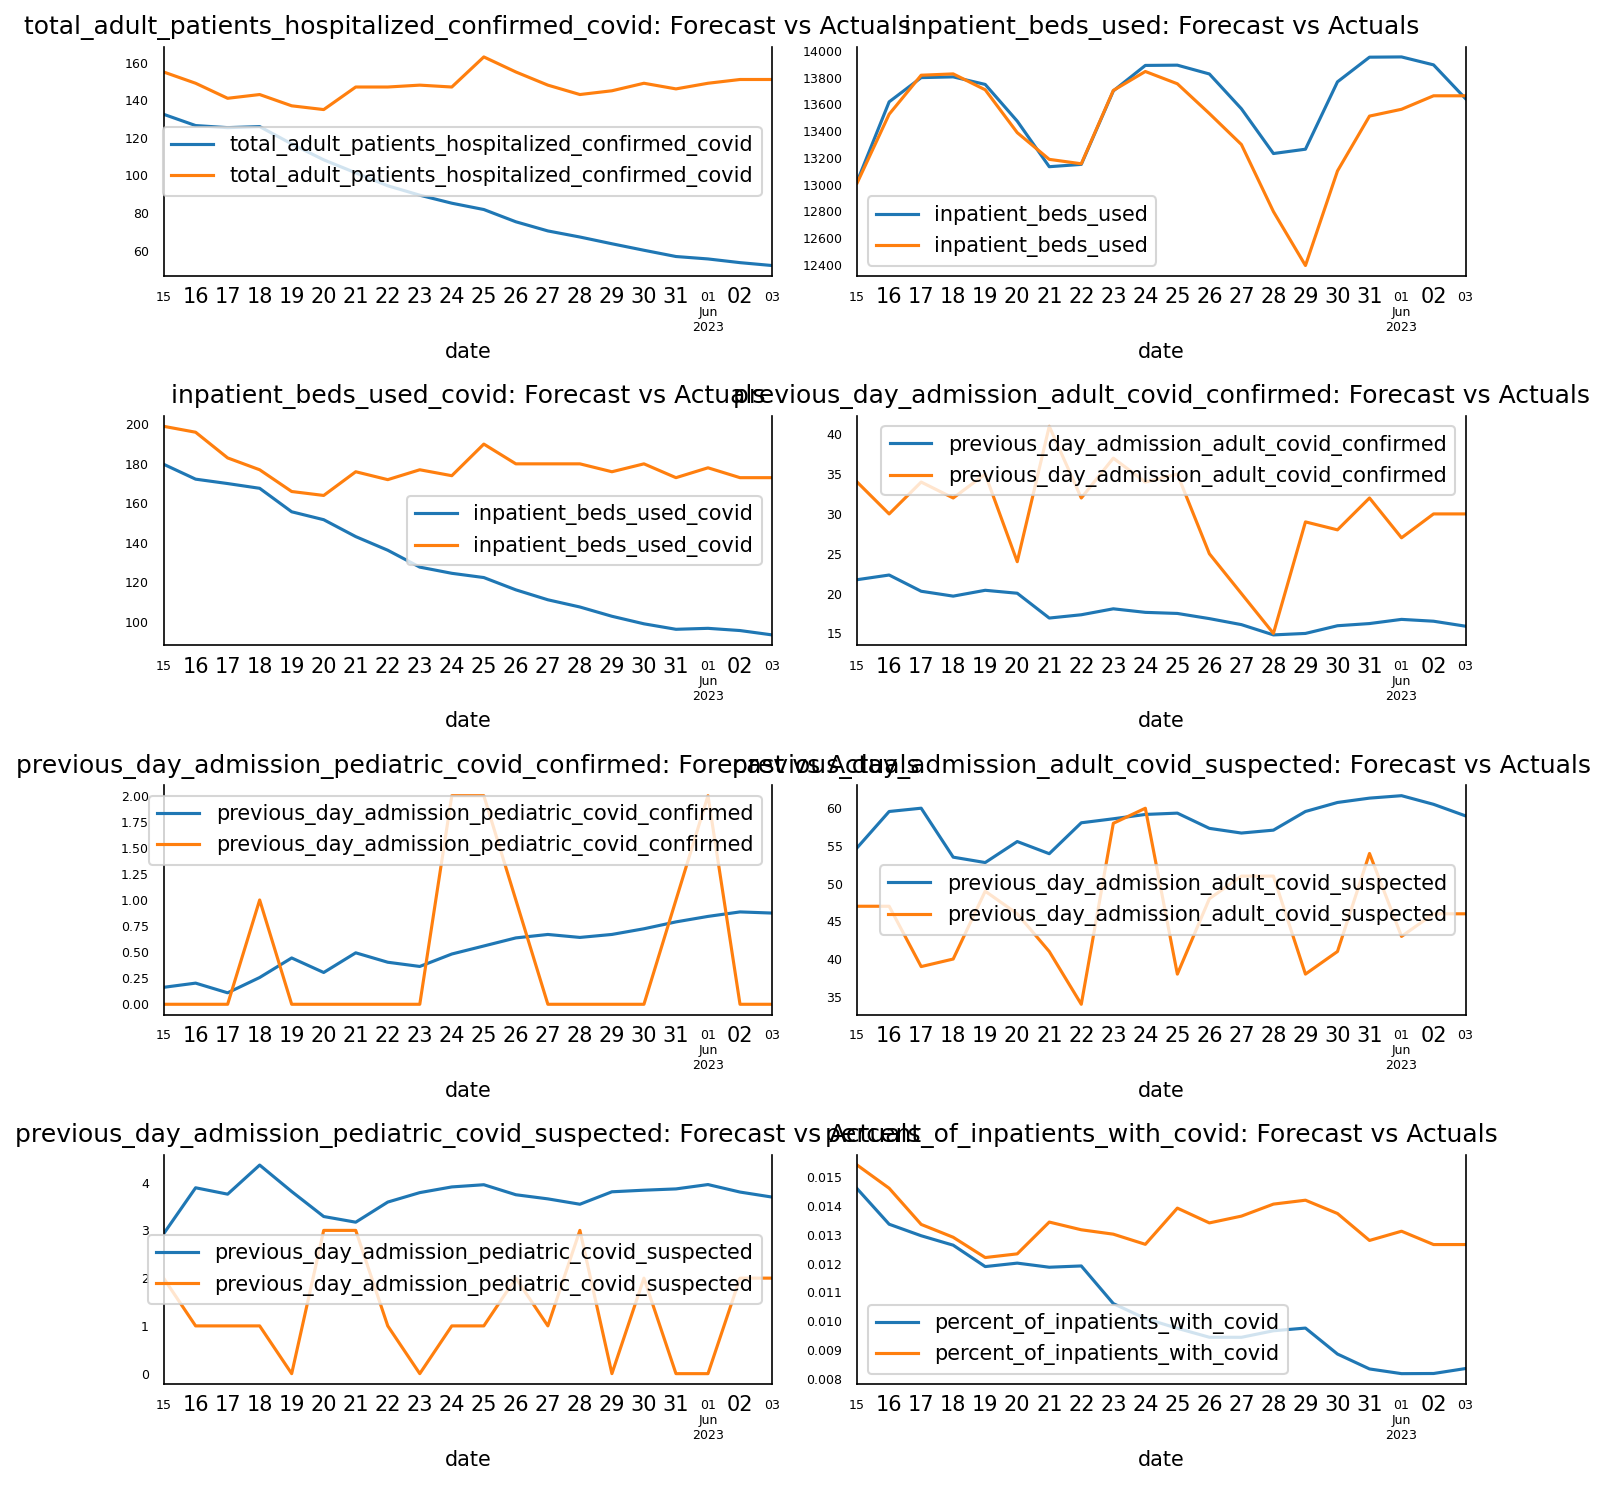

In [21]:
df_results = df_forecast

fig, axes = plt.subplots(nrows=int(len(filtered_data.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(filtered_data.columns, axes.flatten())):
    df_results[col].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-test_size:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [22]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: total_adult_patients_hospitalized_confirmed_covid')
accuracy_prod = forecast_accuracy(df_results['total_adult_patients_hospitalized_confirmed_covid'].values, df_test['total_adult_patients_hospitalized_confirmed_covid'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: total_adult_patients_hospitalized_confirmed_covid
mape   :  0.4058
me     :  -60.3214
mae    :  60.3214
mpe    :  -0.4058
rmse   :  67.0505
corr   :  -0.28
minmax :  0.4058
